In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import pandas as pd
import numpy as np
import random
import os
import gc
import warnings; warnings.filterwarnings("ignore")
from sklearn.impute import SimpleImputer 

In [3]:
def reset_seeds(reset_graph_with_backend=None):
    if reset_graph_with_backend is not None:
        K = reset_graph_with_backend
        K.clear_session()
        tf.compat.v1.reset_default_graph()
        print("KERAS AND TENSORFLOW GRAPHS RESET")  # optional

    np.random.seed(1)
    random.seed(2)
    tf.compat.v1.set_random_seed(3)
    os.environ['CUDA_VISIBLE_DEVICES'] = ''  # for GPU
    print("RANDOM SEEDS RESET")  # optional
   
reset_seeds()


RANDOM SEEDS RESET


In [4]:
panel = pd.read_csv(os.path.abspath("../input")+'/panel.csv')
survey = pd.read_csv(os.path.abspath("../input")+'/survey.csv')
response_train = pd.read_csv(os.path.abspath("../input")+'/response_train.csv')
response_test = pd.read_csv(os.path.abspath("../input")+'/response_test.csv')

In [5]:
# panel조사 분류별 응답률 피처 생성
SQ = ['SQ1', 'SQ2', 'SQ3', 'SQ4', 'SQ5', 'SQ6', 'SQ7', 'SQ8'] # 개인정보
A = ['A1'] # 신규구입/렌트 가전
B = ['B1', 'B2', 'B3', 'B4', 'B5'] # 통신
C = ['C1', 'C2', 'C3'] # 보험/금융
D = ['DQ1', 'DQ2', 'DQ3', 'DQ4', 'DQ5', 'DQ6', 'DQ7'] # 직업
F = ['F1', 'F2'] # 이용마트
H = ['H1'] # 음용주류
T = ['T1'] # 담배
X = ['X1', 'X2', 'X3', 'X4'] # 자동차

panel['SQ_R'] = 1 - panel[SQ].isnull().mean(axis=1)
panel['A_R'] = 1 - panel[A].isnull().mean(axis=1)
panel['B_R'] = 1 - panel[B].isnull().mean(axis=1)
panel['C_R'] = 1 - panel[C].isnull().mean(axis=1)
panel['D_R'] = 1 - panel[D].isnull().mean(axis=1)
panel['F_R'] = 1 - panel[F].isnull().mean(axis=1)
panel['H_R'] = 1 - panel[H].isnull().mean(axis=1)
panel['T_R'] = 1 - panel[T].isnull().mean(axis=1)
panel['X_R'] = 1 - panel[X].isnull().mean(axis=1)
# panel 조사 전체 응답률
panel['ALL_R'] = 1 - panel[SQ+A+B+C+D+F+H+T+X].isnull().mean(axis=1)

In [6]:
train = response_train.merge(panel).merge(survey)
test = response_test.merge(panel).merge(survey).sort_values(by='ID')

In [7]:
del panel, survey, response_train, response_test
gc.collect()

0

설문조사 칼럼 값 다듬기

In [9]:
def handle_profile_SQ4(x):
    if x in ['1', '2', '3', '4', '5', '6']:
        return int(x)
    elif x in ['1,', '2,', '3,', '4,', '5,', '6,']:
        return int(x[0])
    else:
        return 99

train.SQ4 = train.SQ4.apply(handle_profile_SQ4)
test.SQ4 = test.SQ4.apply(handle_profile_SQ4)

In [10]:
def handle_profile_SQ5(x):
    if x in ['1', '2', '3', '4']:
        return int(x)
    elif x in ['1.0', '2.0', '3.0', '4.0']:
        return int(x[0])
    else:
        return 99

train.SQ5 = train.SQ5.apply(handle_profile_SQ5)
test.SQ5 = test.SQ5.apply(handle_profile_SQ5)

In [11]:
def handle_profile_SQ6(x):
    if x in ['1', '2']:
        return int(x)
    elif x in ['1,', '2,']:
        return int(x[0])
    else:
        return 99

train.SQ6 = train.SQ6.apply(handle_profile_SQ6)
test.SQ6 = test.SQ6.apply(handle_profile_SQ6)

In [12]:
value1 = pd.Series(range(1,17)).apply(lambda x: str(x)).tolist()
value2 = pd.Series(np.arange(1.0,17.0)).apply(lambda x: str(x)).tolist()
def handle_profile_SQ7(x):
    if x in value1:
        return int(x)
    elif x in value2:
        return int(x[0])
    else:
        return 99

train.SQ7 = train.SQ7.apply(handle_profile_SQ7)
test.SQ7 = test.SQ7.apply(handle_profile_SQ7)

In [13]:
def handle_profile_SQ8(x):
    if x in ['1', '2', '3', '4', '5']:
        return int(x)
    else:
        return 99

train.SQ8 = train.SQ8.apply(handle_profile_SQ8)
test.SQ8 = test.SQ8.apply(handle_profile_SQ8)

In [14]:
values = pd.Series(range(1,23)).apply(lambda x: str(x)).tolist() # [1,2,...,22]
def handle_profile_A1(x):    
    if x in values:
        return int(x)
    else:
        return 99

train.A1 = train.A1.apply(handle_profile_A1)
test.A1 = test.A1.apply(handle_profile_A1)

In [15]:
def handle_profile_B1(x):    
    if x in ['1']:
        return 2
    elif x in ['2', '3']:
        return 3
    elif x in ['4', '5', '6', '7']:
        return 4
    elif x in ['8']:
        return 5
    else:
        return 99

train.B1 = train.B1.apply(handle_profile_B1)
test.B1 = test.B1.apply(handle_profile_B1)

In [16]:
def handle_profile_B2(x):
    if x in ['1', '2', '3', '4', '5', '6']:
        return int(x)
    else:
        return 99

train.B2 = train.B2.apply(handle_profile_B2)
test.B2 = test.B2.apply(handle_profile_B2)

In [17]:
def handle_profile_B3(x):    
    if x in ['1', '2', '3']:
        return int(x)
    elif x in ['1,', '2,', '3,']:
        return int(x[0])
    elif x in ['99', '99,']:
        return 99
    else:
        return 4  # 기타 제조사

train.B3 = train.B3.apply(handle_profile_B3)
test.B3 = test.B3.apply(handle_profile_B3)

In [18]:
import re

# 해당 단어가 얼마나 자주 등장하는지에 대한 점수
word_counts = {}
def count_word(x): #status=1인 데이터의 title에서 한글 단어 빈도 계산
    if x['STATUS'] == 1:
        for w in re.sub(r'[^ ㄱ-ㅣ가-힣]', '', x['TITLE']).split():
            # 문자열에서 한글이 아닌 문자 제거
            word_counts[w] = word_counts.get(w, 0) + 1 # 한글단어 출현 빈도 저장
def score_word(x): # 빈도 기반으로 title을 인코딩 
    score = 0
    for w in re.sub(r'[^ ㄱ-ㅣ가-힣]', '', x['TITLE']).split():
        score += word_counts.get(w, 0) # 단어 빈도 합산
    return score    
            
train.apply(count_word, axis=1)
train.TITLE = train.apply(score_word, axis=1)
test.TITLE = test.apply(score_word, axis=1)

In [19]:
train.TIME = train.TIME.astype('datetime64[s]')
test.TIME = test.TIME.astype('datetime64[s]')

In [20]:
train['TIME_hour'] = train.TIME.dt.hour
train['TIME_min'] = train.TIME.dt.minute
train['dayofweek'] = train.TIME.dt.dayofweek

test['TIME_hour'] = test.TIME.dt.hour
test['TIME_min'] = test.TIME.dt.minute
test['dayofweek'] = test.TIME.dt.dayofweek

In [21]:
y_train = train['STATUS']
test_id = test.ID
# 중복 + 결측치 비율이 30% 이상인 칼럼 삭제
X_train = train.drop(['userID','surveyID','TIME','STATUS',
                     'TYPE','SQ1','SQ2','SQ3','B4','B5',
                     'C1','C2','C3','F1','F2','H1',
                     'T1','X1','X2','X3','X4','DQ1','DQ2','DQ3',
                     'DQ4','DQ5','DQ6','DQ7','CATEGORIES'], axis = 1)
X_test = test.drop(['userID','ID','surveyID','TIME',
                   'TYPE','SQ1','SQ2','SQ3','B4','B5',
                     'C1','C2','C3','F1','F2','H1',
                     'T1','X1','X2','X3','X4','DQ1','DQ2','DQ3',
                     'DQ4','DQ5','DQ6','DQ7','CATEGORIES'], axis = 1)

In [22]:
del train, test
gc.collect()

44

In [23]:
# 범주형 변수와 수치형 변수를 분리
cat_features = ['GENDER','dayofweek','REGION','SQ4','SQ5','SQ6','SQ7',
                'SQ8','A1','B1','B2','B3']
num_features = list(set(X_train.columns) - set(cat_features))

In [24]:
num_na = ['BIRTH']
cat_na = ['GENDER', 'REGION']

In [25]:
from sklearn.impute import SimpleImputer 

if len(num_na) > 0:
    imp = SimpleImputer(strategy='mean')
    X_train[num_na] = imp.fit_transform(X_train[num_na])
    X_test[num_na] = imp.transform(X_test[num_na])
if len(cat_na) > 0:  
    imp = SimpleImputer(strategy="most_frequent")
    X_train[cat_na] = imp.fit_transform(X_train[cat_na])
    X_test[cat_na] = imp.transform(X_test[cat_na])

In [26]:
# 데이터 스케일링
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

In [27]:
from sklearn.preprocessing import OneHotEncoder

In [28]:
# 원 핫 인코딩
for i in cat_features:
    ohe = OneHotEncoder(sparse=False)
    
    # 변환된 데이터
    a = ohe.fit_transform(X_train[[i]])
    b = ohe.transform(X_test[[i]])
    
    # 새로운 컬럼명 생성 (컬럼명_값 형태)
    new_columns = [f"{i}_{val}" for val in ohe.categories_[0]]
    
    # 데이터프레임으로 변환
    c = pd.DataFrame(a, columns=new_columns, index=X_train.index)
    d = pd.DataFrame(b, columns=new_columns, index=X_test.index)
    
    # 기존 카테고리 변수 제거 후 새로운 컬럼 추가
    X_train = pd.concat([X_train.drop(columns=[i]), c], axis=1)
    X_test = pd.concat([X_test.drop(columns=[i]), d], axis=1)

In [32]:
#X_train = X_train.astype(float)
#X_test = X_test.astype(float)

In [30]:
import shap
from lightgbm import LGBMClassifier

[LightGBM] [Info] Number of positive: 417654, number of negative: 752891
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.076496 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 589
[LightGBM] [Info] Number of data points in the train set: 1170545, number of used features: 121
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.356803 -> initscore=-0.589267
[LightGBM] [Info] Start training from score -0.589267


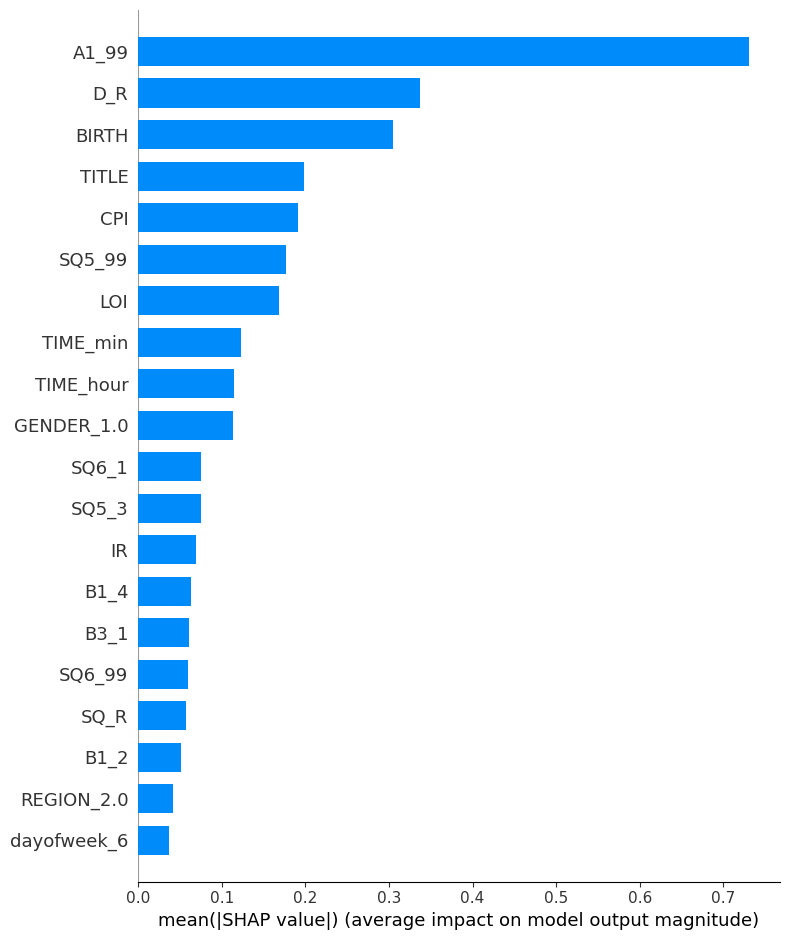

,column_name,shap_importance
103,A1_99,0.731154
5,D_R,0.337415
0,BIRTH,0.305397
11,TITLE,0.198286
14,CPI,0.190871
...,...,...
114,B2_6,0.0
94,A1_14,0.0
91,A1_11,0.0
85,A1_5,0.0


In [42]:
# DF, based on which importance is checked
X_importance = X_test

# Explain model predictions using shap library:
model = LGBMClassifier(random_state=0).fit(X_train, y_train)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_importance)
# Plot summary_plot as barplot:
shap.summary_plot(shap_values, X_importance, plot_type='bar')


feature_names = X_importance.columns.tolist()
## 변수 중요도
a = []
b = []
for i in range(X_importance.shape[1]):
    feature_imp = np.mean(np.abs(shap_values[:, i]))
    a.append(feature_names[i])
    b.append(feature_imp)

importance_df = pd.DataFrame([a, b]).T
importance_df.columns = ['column_name', 'shap_importance']
importance_df = importance_df.sort_values('shap_importance', ascending=False)
importance_df

In [43]:
features_selected = importance_df.query('shap_importance > 0').column_name.tolist()

In [44]:
features_selected

['A1_99',
 'D_R',
 'BIRTH',
 'TITLE',
 'CPI',
 'SQ5_99',
 'LOI',
 'TIME_min',
 'TIME_hour',
 'GENDER_1.0',
 'SQ6_1',
 'SQ5_3',
 'IR',
 'B1_4',
 'B3_1',
 'SQ6_99',
 'SQ_R',
 'B1_2',
 'REGION_2.0',
 'dayofweek_6',
 'B_R',
 'C_R',
 'dayofweek_5',
 'SQ8_99',
 'B3_4',
 'dayofweek_4',
 'B3_99',
 'SQ7_99',
 'B1_5',
 'H_R',
 'SQ5_2',
 'B1_99',
 'X_R',
 'REGION_512.0',
 'SQ8_3',
 'B2_99',
 'F_R',
 'dayofweek_3',
 'SQ7_3',
 'SQ4_99',
 'dayofweek_0',
 'SQ4_3',
 'dayofweek_1',
 'A1_1',
 'SQ4_2',
 'SQ7_1',
 'B3_2',
 'SQ5_1',
 'B2_1',
 'T_R',
 'dayofweek_2',
 'SQ8_1',
 'SQ7_2',
 'SQ4_1',
 'B3_3',
 'REGION_1024.0',
 'A_R',
 'A1_3',
 'REGION_16384.0',
 'B2_2',
 'SQ8_4',
 'SQ7_8',
 'SQ7_16',
 'SQ7_13',
 'REGION_64.0',
 'SQ7_11',
 'REGION_32.0',
 'SQ8_2',
 'REGION_16.0',
 'REGION_4.0',
 'REGION_65536.0',
 'SQ5_4',
 'REGION_128.0',
 'B2_3',
 'B2_4',
 'A1_13',
 'REGION_32768.0',
 'B1_3',
 'A1_2',
 'REGION_8.0',
 'SQ7_12',
 'REGION_256.0',
 'SQ4_4',
 'A1_7',
 'REGION_2048.0',
 'SQ4_5',
 'SQ7_6',
 'A1_17',


In [30]:
'''
features_selected = ['A1_99','D_R','BIRTH','TITLE','CPI','SQ5_99','LOI','TIME_min','TIME_hour','GENDER_1.0',
 'SQ6_1','SQ5_3','IR','B1_4','B3_1','SQ6_99','SQ_R','B1_2','REGION_2.0','dayofweek_6','B_R','C_R','dayofweek_5',
 'SQ8_99','B3_4','dayofweek_4','B3_99','SQ7_99','B1_5','H_R','SQ5_2','B1_99','X_R','REGION_512.0','SQ8_3',
 'B2_99','F_R','dayofweek_3','SQ7_3','SQ4_99','dayofweek_0','SQ4_3','dayofweek_1','A1_1','SQ4_2','SQ7_1','B3_2','SQ5_1',
 'B2_1','T_R','dayofweek_2','SQ8_1','SQ7_2','SQ4_1','B3_3','REGION_1024.0','A_R','A1_3','REGION_16384.0','B2_2','SQ8_4','SQ7_8','SQ7_16',
 'SQ7_13','REGION_64.0','SQ7_11','REGION_32.0','SQ8_2','REGION_16.0','REGION_4.0','REGION_65536.0','SQ5_4','REGION_128.0','B2_3','B2_4',
 'A1_13','REGION_32768.0','B1_3','A1_2','REGION_8.0','SQ7_12','REGION_256.0','SQ4_4','A1_7','REGION_2048.0','SQ4_5','SQ7_6',
 'A1_17','SQ7_5','A1_20','B2_5','SQ6_2','REGION_4096.0','REGION_8192.0','SQ7_14','A1_10','A1_21','SQ4_6','A1_18','SQ7_7','SQ8_5',
 'A1_16','REGION_131072.0','SQ7_4','SQ7_15','SQ7_9','A1_4','A1_8','A1_6','SQ7_10','A1_12','A1_15','A1_19','A1_9']
'''

"\nfeatures_selected = ['A1_99','D_R','BIRTH','TITLE','CPI','SQ5_99','LOI','TIME_min','TIME_hour','GENDER_1.0',\n 'SQ6_1','SQ5_3','IR','B1_4','B3_1','SQ6_99','SQ_R','B1_2','REGION_2.0','dayofweek_6','B_R','C_R','dayofweek_5',\n 'SQ8_99','B3_4','dayofweek_4','B3_99','SQ7_99','B1_5','H_R','SQ5_2','B1_99','X_R','REGION_512.0','SQ8_3',\n 'B2_99','F_R','dayofweek_3','SQ7_3','SQ4_99','dayofweek_0','SQ4_3','dayofweek_1','A1_1','SQ4_2','SQ7_1','B3_2','SQ5_1',\n 'B2_1','T_R','dayofweek_2','SQ8_1','SQ7_2','SQ4_1','B3_3','REGION_1024.0','A_R','A1_3','REGION_16384.0','B2_2','SQ8_4','SQ7_8','SQ7_16',\n 'SQ7_13','REGION_64.0','SQ7_11','REGION_32.0','SQ8_2','REGION_16.0','REGION_4.0','REGION_65536.0','SQ5_4','REGION_128.0','B2_3','B2_4',\n 'A1_13','REGION_32768.0','B1_3','A1_2','REGION_8.0','SQ7_12','REGION_256.0','SQ4_4','A1_7','REGION_2048.0','SQ4_5','SQ7_6',\n 'A1_17','SQ7_5','A1_20','B2_5','SQ6_2','REGION_4096.0','REGION_8192.0','SQ7_14','A1_10','A1_21','SQ4_6','A1_18','SQ7_7','SQ8_5',\n 'A1_16',

In [31]:
X_train = X_train[features_selected]
X_test = X_test[features_selected]

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
train_X, valid_X, train_y, valid_y = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

tensorflow keras

In [80]:
from keras.callbacks import ModelCheckpoint

In [81]:
input = keras.Input(shape=(train_X.shape[1],))

x = keras.layers.Dense(128, activation='relu')(input)# input을 128차원 벡터로 변환, 활성화함수 relu 
output = keras.layers.Dense(1, activation='sigmoid')(x)# 출력층, 이진 분류로 1개 뉴런, 시그모이드 함수로 이진 분류 확률 반환

DEEP = keras.Model(input, output) # 모델 정의

DEEP.summary() # 모델 구조 출력

#Image(keras.utils.model_to_dot(DEEP,show_shapes=True,show_layer_names=False, dpi=100).create(prog='dot', format='png'))

DEEP.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc', keras.metrics.AUC()])

callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience = 5),] # 5번의 epoch동안 검증 손실의 개선 없으면 학습 종료

mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)# 검증 손실기준으로 모델 개선 될때 마다 모델 저장

hist = DEEP.fit(train_X, train_y, validation_data=(valid_X, valid_y), 
                 batch_size=1024, epochs=15, callbacks=[callbacks, mc], shuffle=False, verbose=2)
# 1024개의 샘플로 한번의 학습 진행, 전체 데이터를 15번 반복학습

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 114)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        14,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,849 (58.00 KB)

 Trainable params: 14,849 (58.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15


801/801 - 4s - 5ms/step - acc: 0.7598 - auc_1: 0.8340 - loss: 0.4743 - val_acc: 0.7726 - val_auc_1: 0.8481 - val_loss: 0.4573
Epoch 2/15


801/801 - 2s - 3ms/step - acc: 0.7773 - auc_1: 0.8530 - loss: 0.4509 - val_acc: 0.7817 - val_auc_1: 0.8578 - val_loss: 0.4447
Epoch 3/15


801/801 - 2s - 3ms/step - acc: 0.7851 - auc_1: 0.8614 - loss: 0.4398 - val_acc: 0.7880 - val_auc_1: 0.8647 - val_loss: 0.4354
Epoch 4/15


801/801 - 2s - 3ms/step - acc: 0.7910 - auc_1: 0.8677 - loss: 0.4310 - val_acc: 0.7931 - val_auc_1: 0.8698 - val_loss: 0.4282
Epoch 5/15


801/801 - 2s - 3ms/step - acc: 0.7959 - auc_1: 0.8727 - loss: 0.4238 - val_acc: 0.7967 - val_auc_1: 0.8737 - val_loss: 0.4225
Epoch 6/15


801/801 - 2s - 3ms/step - acc: 0.7996 - auc_1: 0.8766 - loss: 0.4180 - val_acc: 0.7999 - val_auc_1: 0.8770 - val_loss: 0.4176
Epoch 7/15


801/801 - 2s - 3ms/step - acc: 0.8027 - auc_1: 0.8799 - loss: 0.4131 - val_acc: 0.8025 - val_auc_1: 0.8797 - val_loss: 0.4136
Epoch 8/15


801/801 - 2s - 3ms/step - acc: 0.8056 - auc_1: 0.8826 - loss: 0.4088 - val_acc: 0.8048 - val_auc_1: 0.8820 - val_loss: 0.4101
Epoch 9/15


801/801 - 2s - 3ms/step - acc: 0.8079 - auc_1: 0.8850 - loss: 0.4050 - val_acc: 0.8064 - val_auc_1: 0.8838 - val_loss: 0.4073
Epoch 10/15


801/801 - 2s - 3ms/step - acc: 0.8099 - auc_1: 0.8871 - loss: 0.4017 - val_acc: 0.8080 - val_auc_1: 0.8856 - val_loss: 0.4044
Epoch 11/15


801/801 - 2s - 3ms/step - acc: 0.8117 - auc_1: 0.8889 - loss: 0.3987 - val_acc: 0.8092 - val_auc_1: 0.8870 - val_loss: 0.4021
Epoch 12/15


801/801 - 2s - 3ms/step - acc: 0.8132 - auc_1: 0.8905 - loss: 0.3961 - val_acc: 0.8104 - val_auc_1: 0.8883 - val_loss: 0.4001
Epoch 13/15


801/801 - 2s - 3ms/step - acc: 0.8145 - auc_1: 0.8919 - loss: 0.3938 - val_acc: 0.8116 - val_auc_1: 0.8894 - val_loss: 0.3983
Epoch 14/15


801/801 - 2s - 3ms/step - acc: 0.8156 - auc_1: 0.8931 - loss: 0.3918 - val_acc: 0.8125 - val_auc_1: 0.8904 - val_loss: 0.3967
Epoch 15/15


801/801 - 2s - 3ms/step - acc: 0.8168 - auc_1: 0.8942 - loss: 0.3900 - val_acc: 0.8135 - val_auc_1: 0.8913 - val_loss: 0.3954


In [ ]:
pd.DataFrame({'ID': test_id, 'STATUS': DEEP.predict(X_test).flatten()}).to_csv(os.path.abspath("../submission") + "/deeplearning.csv", index=False)

keras tuner

In [34]:
def model_fn(hp):
    inputs = keras.Input(shape=(train_X.shape[1],))
    x = keras.layers.Dense(hp.Int('unit', 16, 32, step=16), hp.Choice('activation', ['relu', 'elu']))(inputs)
    x = keras.layers.Dropout(hp.Float('dropout', 0, 0.25, step=0.25, default=0.25))(x)
    outputs = keras.layers.Dense(1, activation='sigmoid')(x)
    model = keras.Model(inputs, outputs)
    model.compile(loss='binary_crossentropy', 
                  optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3])), 
                  metrics=[keras.metrics.AUC()])
    return model

In [35]:
import kerastuner as kt
tuner = kt.Hyperband(model_fn,
                     objective='val_auc', 
                     max_epochs=5,
                     hyperband_iterations=2,
                     overwrite=True,
                     directory='tuning')

tuner.search(train_X, train_y, validation_data=(valid_X, valid_y), 
             callbacks=[tf.keras.callbacks.EarlyStopping(patience=1)])

Trial 20 Complete [00h 05m 56s]
val_auc: 0.8569934964179993

Best val_auc So Far: 0.8670629858970642
Total elapsed time: 01h 16m 53s


In [36]:
model = tuner.get_best_models(1)[0]
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 114)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         3,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,713 (14.50 KB)

 Trainable params: 3,713 (14.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
tuner.results_summary(1)t = pd.Timestamp.now()
fname = f"dnn_tuned_submission_{t.month:02}{t.day:02}_{t.hour:02}{t.minute:02}.csv"
pd.DataFrame({'ID': test_id, 'STATUS': model.predict(X_test).flatten()}).to_csv(fname, index=False)